In [184]:
import pandas as pn
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import numpy as np
import seaborn as sns
import geopandas as gpd

In [6]:
squid = pn.read_csv('sf_bt_longfin.csv')

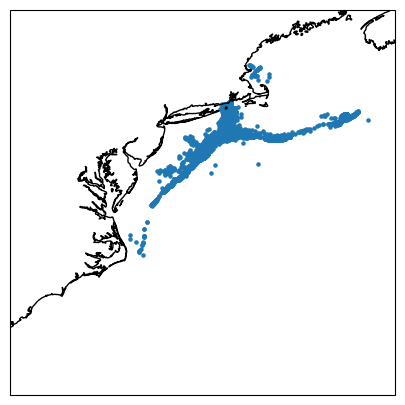

In [38]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([-80, -65, 30, 45], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.scatter(squid.START_HAUL_LON_DD[squid.SAIL_MONTH == 1], squid.START_HAUL_LAT_DD[squid.SAIL_MONTH == 1], s = 5)


In [39]:
squid_subset = squid[squid.START_HAUL_LON_DD<-60]

In [36]:
monthly_mom = xr.open_dataset('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/bt_mom6_M.nc')

In [51]:
monthly_mom.lon-360

<xarray.DataArray 'lon' (lon: 477)>
array([-98.44226074, -98.3615851 , -98.28090945, -98.2002338 ,
       -98.11955816, -98.03888251, -97.95820687, -97.87753122,
       -97.79685558, -97.71617993, -97.63550428, -97.55482864,
       -97.47415299, -97.39347735, -97.3128017 , -97.23212606,
       -97.15145041, -97.07077476, -96.99009912, -96.90942347,
       -96.82874783, -96.74807218, -96.66739654, -96.58672089,
       -96.50604524, -96.4253696 , -96.34469395, -96.26401831,
       -96.18334266, -96.10266702, -96.02199137, -95.94131572,
       -95.86064008, -95.77996443, -95.69928879, -95.61861314,
       -95.53793749, -95.45726185, -95.3765862 , -95.29591056,
       -95.21523491, -95.13455927, -95.05388362, -94.97320797,
       -94.89253233, -94.81185668, -94.73118104, -94.65050539,
       -94.56982975, -94.4891541 , -94.40847845, -94.32780281,
       -94.24712716, -94.16645152, -94.08577587, -94.00510023,
       -93.92442458, -93.84374893, -93.76307329, -93.68239764,
       -93.601722  , -93.52104635, -93.44037071, -93.35969506,
       -93.27901941, -93.19834377, -93.11766812, -93.03699248,
       -92.95631683, -92.87564118, -92.79496554, -92.71428989,
       -92.63361425, -92.5529386 , -92.47226296, -92.39158731,
       -92.31091166, -92.23023602, -92.14956037, -92.06888473,
...
       -66.17200244, -66.09132679, -66.01065115, -65.9299755 ,
       -65.84929986, -65.76862421, -65.68794856, -65.60727292,
       -65.52659727, -65.44592163, -65.36524598, -65.28457034,
       -65.20389469, -65.12321904, -65.0425434 , -64.96186775,
       -64.88119211, -64.80051646, -64.71984082, -64.63916517,
       -64.55848952, -64.47781388, -64.39713823, -64.31646259,
       -64.23578694, -64.1551113 , -64.07443565, -63.99376   ,
       -63.91308436, -63.83240871, -63.75173307, -63.67105742,
       -63.59038178, -63.50970613, -63.42903048, -63.34835484,
       -63.26767919, -63.18700355, -63.1063279 , -63.02565226,
       -62.94497661, -62.86430096, -62.78362532, -62.70294967,
       -62.62227403, -62.54159838, -62.46092273, -62.38024709,
       -62.29957144, -62.2188958 , -62.13822015, -62.05754451,
       -61.97686886, -61.89619321, -61.81551757, -61.73484192,
       -61.65416628, -61.57349063, -61.49281499, -61.41213934,
       -61.33146369, -61.25078805, -61.1701124 , -61.08943676,
       -61.00876111, -60.92808547, -60.84740982, -60.76673417,
       -60.68605853, -60.60538288, -60.52470724, -60.44403159,
       -60.36335595, -60.2826803 , -60.20200465, -60.12132901,
       -60.04065336])
Coordinates:
  * lon      (lon) float64 261.6 261.6 261.7 261.8 ... 299.7 299.8 299.9 300.0

In [45]:
import numpy as np

In [47]:
def closest(lst, K):
     
     lst = np.asarray(lst)
     idx = (np.abs(lst - K)).argmin()
     return idx

In [64]:
pn.to_datetime(squid_subset.START_HAUL_DATE_GMT[0], format = '%d-%b-%y').year

2020

In [79]:
a =np.where(pn.to_datetime(monthly_mom.time[:].values).year == 2019)
b =np.where(pn.to_datetime(monthly_mom.time[:].values).month == 1)
a[0][0]

312

In [90]:
monthly_mom

<xarray.Dataset>
Dimensions:  (lon: 477, lat: 287, time: 324)
Coordinates:
  * lon      (lon) float64 261.6 261.6 261.7 261.8 ... 299.7 299.8 299.9 300.0
  * lat      (lat) float64 30.05 30.12 30.18 30.24 ... 47.81 47.87 47.93 48.0
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-12-16T12:00:00
Data variables:
    tob      (time, lat, lon) float32 ...
Attributes:
    NumFilesInSet:       1
    title:               NWA12_COBALT_2023_04_kpo4-coastatten-physics
    associated_files:    areacello: 19930101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello
    history:             Derived and written at NOAA Physical Science Laboratory
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    contact:             chia-wei.hsu@noaa.gov
    dataset:             regional mom6 regrid

In [96]:
bt_compare = pn.DataFrame(data = {'Year': 0,
              'Month': 0,
              'OBS_lat': 0,
              'OBS_lon': 0,
              'm6_lat': 0,
              'm6_lon': 0,
              'OBS_temp': 0,
              'm6_temp': 0}, index = 1)

TypeError: Index(...) must be called with a collection of some kind, 1 was passed

In [97]:
squid

,SPECIES_ITIS,TRIP_ID,EFFORT_NUM,SAMPLE_ID,START_HAUL_LAT_DD,START_HAUL_LON_DD,DEPTH_METERS,MESH_SIZE,GEAR_SIZE,SAIL_PORT,...,VESSEL_PERMIT_NUM,TARGET_SPECIES,DISPOSITION_DESCR,HAIL_AMOUNT,END_SET_DATE_GMT,START_HAUL_DATE_GMT,MIN_TEMP_C,MEAN_TEMP_C,MAX_TEMP_C,GTE_CODE
0,82372,31099120022402,1,310991200224021,40.2074,-71.1599,119.0,6.500,88.0,"Point Judith, RI",...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,8.92,13.79,14.17,20
1,82372,31099120022402,2,310991200224022,40.2194,-71.0753,123.0,6.500,88.0,"Point Judith, RI",...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,10.27,13.75,14.17,20
2,82372,31099120022402,3,310991200224023,40.2386,-70.9542,124.0,6.500,88.0,"Point Judith, RI",...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,10.52,14.12,14.31,20
3,82372,31099120022402,4,310991200224024,40.2316,-71.0196,123.0,6.500,88.0,"Point Judith, RI",...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,11.84,14.03,14.24,20
4,82372,33077920030715,11,3307792003071511,39.9848,-69.2799,100.0,2.125,110.0,"Point Judith, RI",...,330779,LOLIGO SQUID,"KEPT, DISPOSITION UNKNOWN",1000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96007,82372,14828423102706,2,148284231027062,41.0057,-71.4523,48.0,6.500,130.0,"Point Judith, RI",...,148284,FLUKE,"KEPT, DISPOSITION UNKNOWN",2.0,NaN,NaN,NaN,NaN,NaN,NaN
96008,82372,14828423102706,3,148284231027063,41.0492,-71.5586,40.0,6.500,130.0,"Point Judith, RI",...,148284,FLUKE,"KEPT, DISPOSITION UNKNOWN",2.0,NaN,NaN,NaN,NaN,NaN,NaN
96009,82372,32013923090607,1,320139230906071,41.2401,-71.7898,33.0,6.500,90.0,"Point Judith, RI",...,320139,FLUKE,"KEPT, DISPOSITION UNKNOWN",4.0,NaN,NaN,NaN,NaN,NaN,NaN
96010,82372,32013923090607,2,320139230906072,41.3080,-71.5852,33.0,6.500,90.0,"Point Judith, RI",...,320139,FLUKE,"KEPT, DISPOSITION UNKNOWN",3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
m6_bt = 0
obs_bt_min = 0
obs_bt_max = 0
obs_bt_mean = 0
obs_lat = 0
obs_lon = 0
m6_lat = 0
m6_lon = 0
year = 0
month = 0

for i in range(1,13):
    squid_subset_month = squid_subset[squid_subset.SAIL_MONTH == i]
    for j in np.unique(squid_subset_month.SAIL_YEAR):
        if j <= 2019:
            squid_subset_month_year = squid_subset_month[squid_subset_month.SAIL_YEAR == j].reset_index()
            for k in np.arange(len(squid_subset_month_year)):
                ind_lat = closest(monthly_mom.lat, squid_subset_month_year.START_HAUL_LAT_DD[k])
                ind_lon = closest(monthly_mom.lon-360, squid_subset_month_year.START_HAUL_LON_DD[k])
                year_list = np.where(pn.to_datetime(monthly_mom.time[:].values).year == 2019)
                mom6_bt = monthly_mom.tob[year_list[0][i-1], ind_lat, ind_lon]

                m6_bt = np.append(m6_bt, mom6_bt.values)
                obs_bt_min = np.append(obs_bt_min, squid_subset_month_year.MIN_TEMP_C[k])
                obs_bt_max = np.append(obs_bt_max, squid_subset_month_year.MAX_TEMP_C[k])
                obs_bt_mean = np.append(obs_bt_mean, squid_subset_month_year.MEAN_TEMP_C[k])
                obs_lat = np.append(obs_lat, squid_subset_month_year.START_HAUL_LAT_DD[k])
                obs_lon = np.append(obs_lon, squid_subset_month_year.START_HAUL_LON_DD[k])
                m6_lat = np.append(m6_lat, monthly_mom.lat[ind_lat].values)
                m6_lon = np.append(m6_lon, monthly_mom.lon[ind_lon].values - 360)
                year = np.append(year, j)
                month = np.append(month, i)

In [126]:
len(m6_t)

2

In [129]:
bt_data = pn.DataFrame(data = {'year': year,
                               'month': month,
                               'obs_lat': obs_lat,
                               'obs_lon': obs_lon,
                               'obs_t_min': obs_bt_min,
                               'obs_t_max': obs_bt_max,
                               'obs_t_mean': obs_bt_mean,
                               'm6_lat': m6_lat,
                               'm6_lon': m6_lon,
                               'm6_t': m6_bt})

In [155]:
bt_min = bt_data[bt_data.columns[0:4]]

In [158]:
bt_min['source'] = 'obs_min'

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\409924919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_min['source'] = 'obs_min'


In [160]:
bt_min['temp'] = bt_data.obs_t_min

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\4061468306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_min['temp'] = bt_data.obs_t_min


In [232]:
bt_min = bt_data[bt_data.columns[0:4]]
bt_min['source'] = 'obs_min'
bt_min['temp'] = bt_data.obs_t_min
bt_min['strata'] = bt_data.strata

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\3329942255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_min['source'] = 'obs_min'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\3329942255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_min['temp'] = bt_data.obs_t_min
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\3329942255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [233]:
bt_mean = bt_data[bt_data.columns[0:4]]
bt_mean['source'] = 'obs_mean'
bt_mean['temp'] = bt_data.obs_t_mean
bt_mean['strata'] = bt_data.strata

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\2923314992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_mean['source'] = 'obs_mean'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\2923314992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_mean['temp'] = bt_data.obs_t_mean
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\2923314992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [234]:
bt_max = bt_data[bt_data.columns[0:4]]
bt_max['source'] = 'obs_max'
bt_max['temp'] = bt_data.obs_t_max
bt_max['strata'] = bt_data.strata

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\3195657844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_max['source'] = 'obs_max'
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\3195657844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_max['temp'] = bt_data.obs_t_max
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\3195657844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [235]:
bt_m6 = bt_data[bt_data.columns[0:2]]
bt_m6['obs_lat'] = bt_data.m6_lat
bt_m6['obs_lon'] = bt_data.m6_lon
bt_m6['source'] = 'mom6'
bt_m6['temp'] = bt_data.m6_t
bt_m6['strata'] = bt_data.strata

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\845435120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_m6['obs_lat'] = bt_data.m6_lat
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\845435120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_m6['obs_lon'] = bt_data.m6_lon
C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\845435120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [171]:
bt_ds = pn.concat([bt_min, bt_max, bt_mean,bt_m6])

In [173]:
bt_ds = bt_ds.reset_index()

<Axes: xlabel='month', ylabel='temp'>

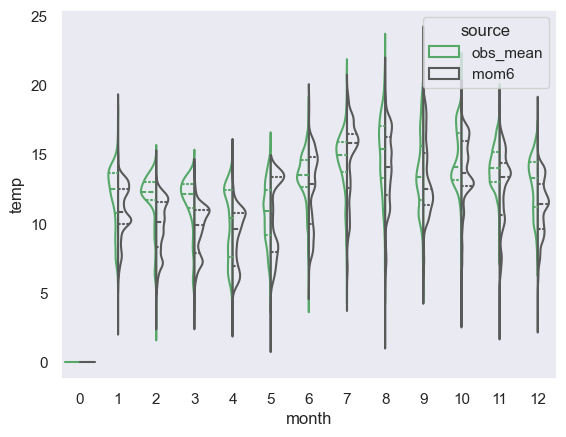

In [181]:
import seaborn as sns
sns.set_theme(style="dark")

# Load the example tips dataset
#tips = sns.load_dataset("tips")
bt_mean_m6 = pn.concat([bt_mean, bt_m6]).reset_index()

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=bt_mean_m6,
               x="month", y="temp", hue="source",
               split=True, inner="quart", fill=False,
               palette={"obs_mean": "g", "mom6": ".35"})

<Axes: xlabel='year', ylabel='temp'>

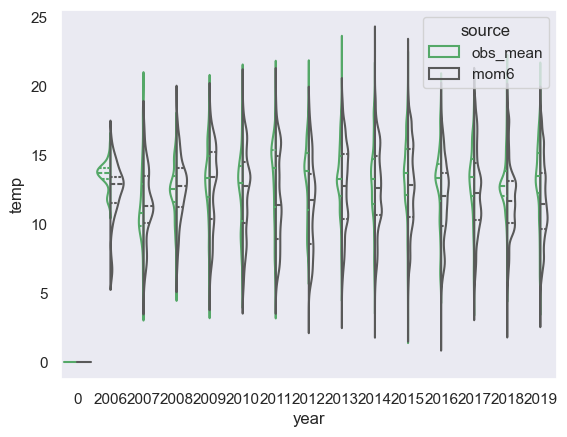

In [182]:
sns.violinplot(data=bt_mean_m6,
               x="year", y="temp", hue="source",
               split=True, inner="quart", fill=False,
               palette={"obs_mean": "g", "mom6": ".35"})


<Axes: xlabel='month', ylabel='temp'>

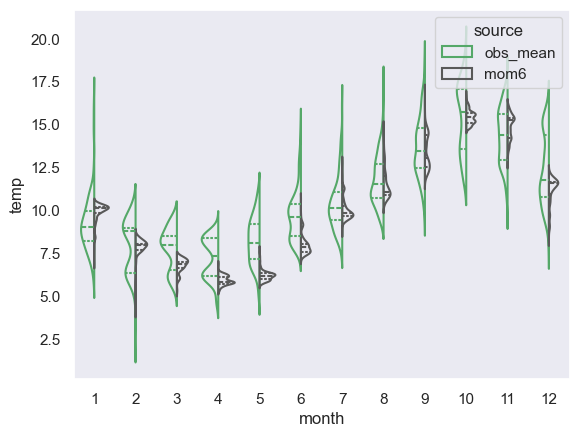

In [236]:
#tips = sns.load_dataset("tips")
bt_mean_m6_20 = pn.concat([bt_mean[bt_mean.strata == '20'], bt_m6[bt_m6.strata == '20']]).reset_index()

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=bt_mean_m6_20,
               x="month", y="temp", hue="source",
               split=True, inner="quart", fill=False,
               palette={"obs_mean": "g", "mom6": ".35"})

<Axes: xlabel='month', ylabel='temp'>

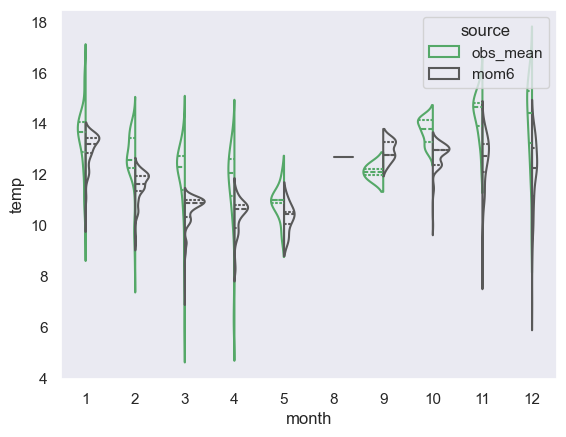

In [241]:
#tips = sns.load_dataset("tips")
bt_mean_m6_19 = pn.concat([bt_mean[bt_mean.strata == '18'], bt_m6[bt_m6.strata == '18']]).reset_index()

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=bt_mean_m6_19,
               x="month", y="temp", hue="source",
               split=True, inner="quart", fill=False,
               palette={"obs_mean": "g", "mom6": ".35"})

In [186]:
strata = gpd.read_file('C:/Users/Laura.Gruenburg/Desktop/Projects/MOM6_Validation/EcoMon_strata/EcoMon_Strata.shp')

In [198]:
df_poly = strata.geometry
df_points = bt_mean

In [218]:
gdf = gpd.GeoDataFrame( geometry= gpd.points_from_xy(bt_data.obs_lon,  bt_data.obs_lat), crs = 'EPSG: 4269')
polygons_contains = gpd.sjoin(strata, gdf, predicate='contains')

In [222]:
bt_data['strata'] = np.nan

In [223]:
polygons_contains = polygons_contains.reset_index()

In [228]:
for i in np.arange(len(polygons_contains)):
    bt_data.strata[polygons_contains.index_right[i]] = polygons_contains.STRATA[i]

C:\Users\Laura.Gruenburg\AppData\Local\Temp\1\ipykernel_9544\90438782.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bt_data.strata[polygons_contains.index_right[i]] = polygons_contains.STRATA[i]
C:\Users\Laura.Gruenburg\AppData\Local\T

In [231]:
bt_data[bt_data.strata == '20']

,year,month,obs_lat,obs_lon,obs_t_min,obs_t_max,obs_t_mean,m6_lat,m6_lon,m6_t,strata
135,2008,1,41.0874,-71.3696,6.50,8.30,8.06,41.095994,-71.335244,9.241834,20
136,2008,1,41.0273,-71.3765,7.80,8.30,8.03,41.033256,-71.415919,9.962750,20
331,2009,1,41.1051,-71.2931,NaN,NaN,NaN,41.095994,-71.254568,8.757309,20
332,2009,1,41.1564,-71.2589,NaN,NaN,NaN,41.158732,-71.254568,8.368910,20
333,2009,1,41.0994,-71.2972,NaN,NaN,NaN,41.095994,-71.335244,9.241834,20
...,...,...,...,...,...,...,...,...,...,...,...
66792,2019,12,40.9257,-71.5189,10.97,11.59,11.29,40.907779,-71.496595,11.931176,20
66839,2019,12,41.0250,-71.4599,NaN,NaN,NaN,41.033256,-71.496595,11.566812,20
66841,2019,12,41.0269,-71.4903,NaN,NaN,NaN,41.033256,-71.496595,11.566812,20
66922,2019,12,41.0296,-71.4548,7.19,10.29,9.97,41.033256,-71.415919,11.289976,20


In [187]:
# lazy loading of data
#ds = xr.open_dataset(
#    "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/regrid/ocean_daily.19930101-20191231.tob.nc",
#    chunks={"time":1}
#)

# loading a slice to memory
#da_load = ds["tob"].isel(time=1).load()

In [ ]:

polygon = Polygon([tuple(x) for x in df_poly[['Lat', 'Lon']].to_numpy()])
df_points['Within'] = df_points.apply(lambda x: polygon.contains(Point(x['Lat'], x['Lon'])), axis=1)

In [88]:
squid_subset2 = squid_subset.reset_index()

In [89]:
squid_subset2

,index,SPECIES_ITIS,TRIP_ID,EFFORT_NUM,SAMPLE_ID,START_HAUL_LAT_DD,START_HAUL_LON_DD,DEPTH_METERS,MESH_SIZE,GEAR_SIZE,...,VESSEL_PERMIT_NUM,TARGET_SPECIES,DISPOSITION_DESCR,HAIL_AMOUNT,END_SET_DATE_GMT,START_HAUL_DATE_GMT,MIN_TEMP_C,MEAN_TEMP_C,MAX_TEMP_C,GTE_CODE
0,0,82372,31099120022402,1,310991200224021,40.2074,-71.1599,119.0,6.500,88.0,...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,8.92,13.79,14.17,20
1,1,82372,31099120022402,2,310991200224022,40.2194,-71.0753,123.0,6.500,88.0,...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,10.27,13.75,14.17,20
2,2,82372,31099120022402,3,310991200224023,40.2386,-70.9542,124.0,6.500,88.0,...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,10.52,14.12,14.31,20
3,3,82372,31099120022402,4,310991200224024,40.2316,-71.0196,123.0,6.500,88.0,...,310991,FLUKE,"KEPT, DISPOSITION UNKNOWN",1.0,24-FEB-20,24-FEB-20,11.84,14.03,14.24,20
4,4,82372,33077920030715,11,3307792003071511,39.9848,-69.2799,100.0,2.125,110.0,...,330779,LOLIGO SQUID,"KEPT, DISPOSITION UNKNOWN",1000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95417,96007,82372,14828423102706,2,148284231027062,41.0057,-71.4523,48.0,6.500,130.0,...,148284,FLUKE,"KEPT, DISPOSITION UNKNOWN",2.0,NaN,NaN,NaN,NaN,NaN,NaN
95418,96008,82372,14828423102706,3,148284231027063,41.0492,-71.5586,40.0,6.500,130.0,...,148284,FLUKE,"KEPT, DISPOSITION UNKNOWN",2.0,NaN,NaN,NaN,NaN,NaN,NaN
95419,96009,82372,32013923090607,1,320139230906071,41.2401,-71.7898,33.0,6.500,90.0,...,320139,FLUKE,"KEPT, DISPOSITION UNKNOWN",4.0,NaN,NaN,NaN,NaN,NaN,NaN
95420,96010,82372,32013923090607,2,320139230906072,41.3080,-71.5852,33.0,6.500,90.0,...,320139,FLUKE,"KEPT, DISPOSITION UNKNOWN",3.0,NaN,NaN,NaN,NaN,NaN,NaN
